In [25]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#your info here
__author__ = "Gulbaz Khan"
__email__ = "gulbazgk@gmail.com@gmail.com"

# Load the data

In [26]:
train_salary_df = pd.read_csv('/Users/gulbazkhan/Desktop/data/train_salaries.csv')
train_features_df = pd.read_csv('/Users/gulbazkhan/Desktop/data/train_features.csv')
test_features_df = pd.read_csv('/Users/gulbazkhan/Desktop/data/test_features.csv')

In [27]:
train_df = pd.merge(train_features_df, train_salary_df, on='jobId')

In [28]:
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [29]:
test_features_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


# Clean the data

In [30]:
train_df.duplicated().sum()
test_features_df.duplicated().sum()
##look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

0

0

In [31]:
train_df[train_df['salary'] <= 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [32]:
train_df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [33]:
train_df = train_df[train_df['salary'] > 0]
train_df.shape
train_df.dtypes


(999995, 9)

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

# Explore the data(EDA)

In [34]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [35]:
train_df.describe() # summarize each continuous variable

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


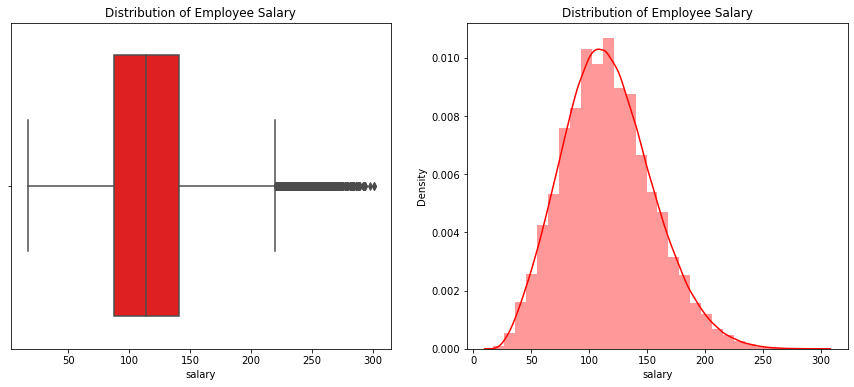

In [36]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary, color='red')
plt.title('Distribution of Employee Salary')
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins = 30, color='red')
plt.title('Distribution of Employee Salary')
plt.savefig("/Users/gulbazkhan/Desktop/data/salary_distribution.png")
plt.show();


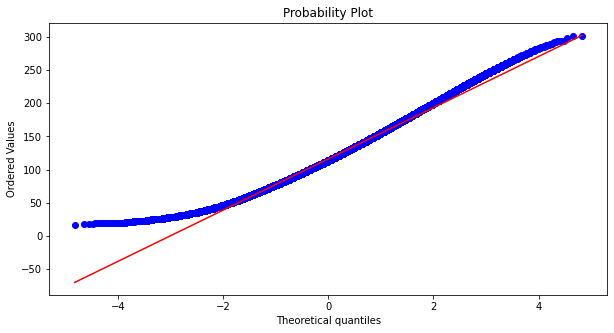

In [37]:
plt.figure(figsize = (10,5))
sp.stats.probplot(train_df.salary, dist='norm', plot=plt) # check for normality
plt.savefig("/Users/gulbazkhan/Desktop/data/salary_quantile_quantile_plot.png")
plt.show();

In [38]:
#Feature variables
train_df.describe(include=['O']) # summarize each categorical variable

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362685203827,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


In [39]:

def plot_feature(df, col):
    """ Make plot for the feature <col> from the data frame <df>.
    """
    plt.figure(figsize = (14, 6))
    if df[col].dtype != 'int64':
        plt.subplot(1, 2, 1)
        # change the categorial variable to category type and order their level by the mean salary in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        mean.sort_values().plot(kind='bar')
        
    if col not in ['companyId', 'yearsExperience', 'milesFromMetropolis']:
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Average Salary by' + ' ' + col.capitalize())
        plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64':
        # plot the mean salary for each category and fill between (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
        plt.savefig("/Users/gulbazkhan/Desktop/data/salary_vs_" + col + ".png")
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
        plt.xticks(rotation=45)
        plt.ylabel('Salaries')
        plt.savefig("/Users/gulbazkhan/Desktop/data/salary_by_" + col + ".png")
        plt.show()

In [40]:
#3 Correlation Between Each Feature and the Target

In [41]:
cat_variables = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'] 
num_variables = ['yearsExperience', 'milesFromMetropolis', 'salary']
feat_variables = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis'] 

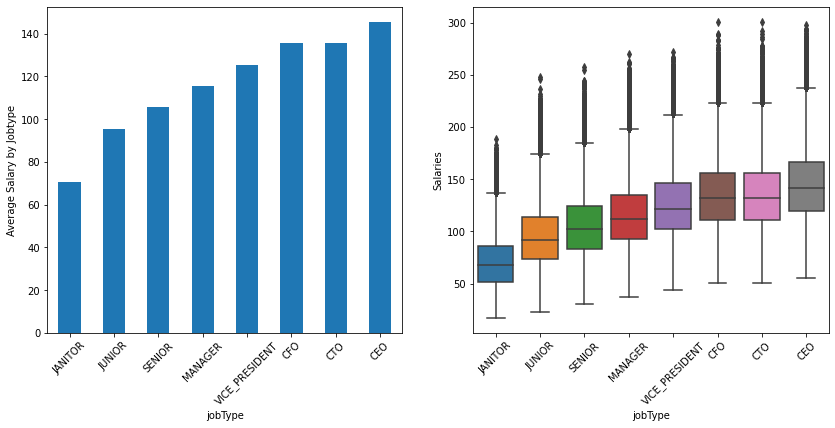

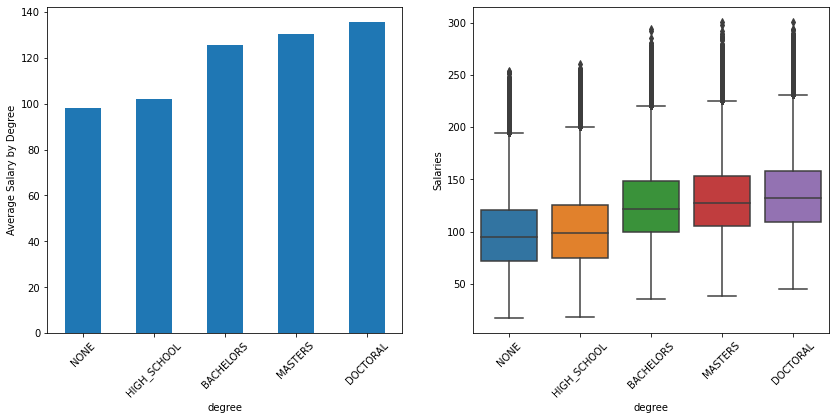

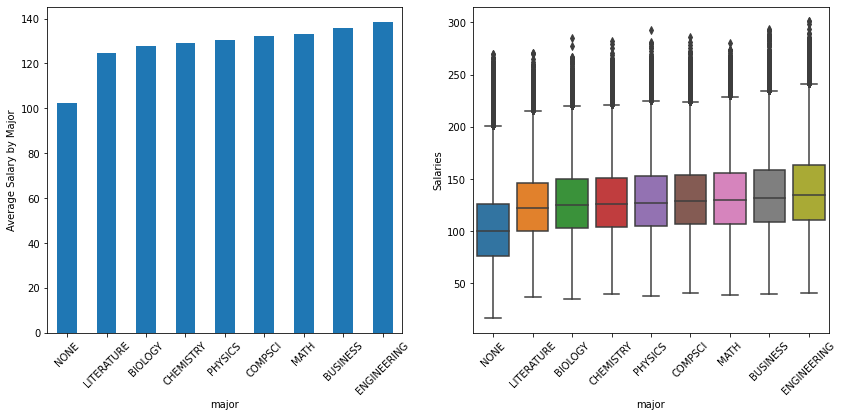

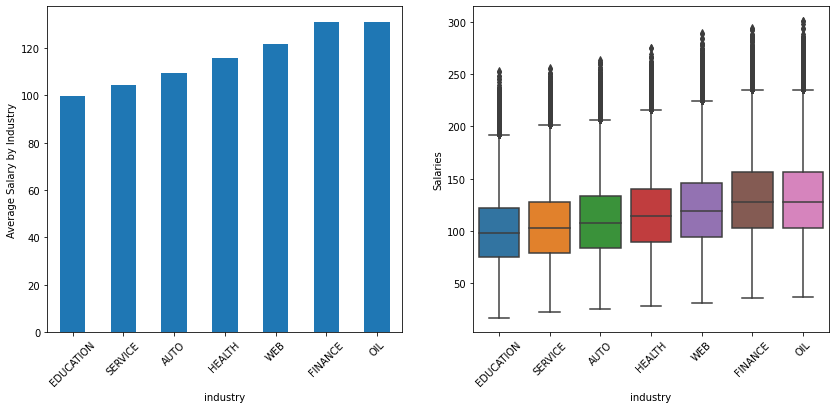

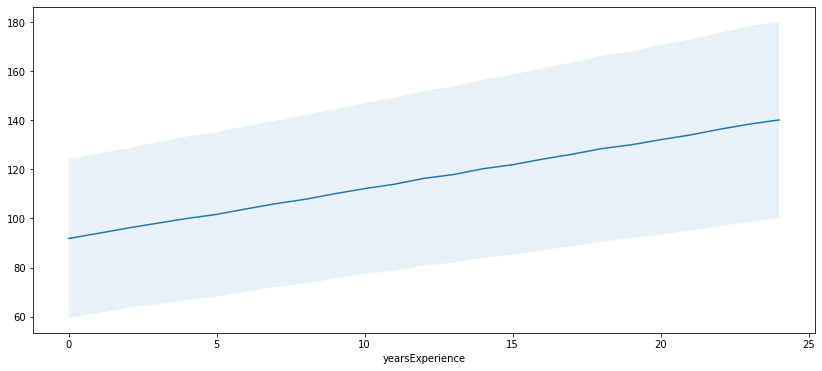

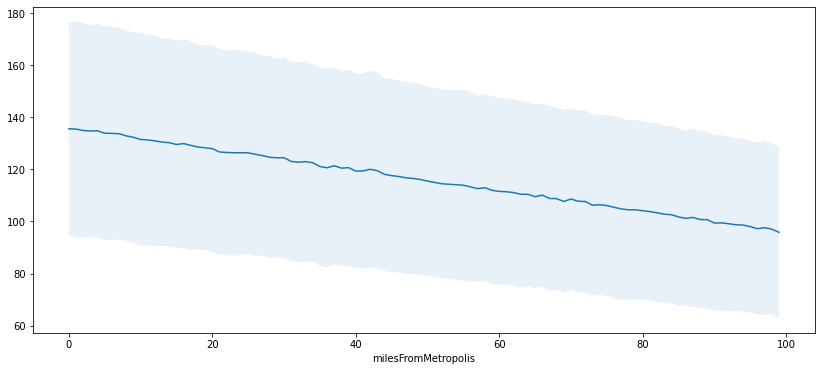

In [42]:
for feature in feat_variables:
    plot_feature(train_df, feature)

In [43]:
#A positive correlation can be seen between average salary and the level of job type and of degree; types like those on C-level have high salary average; a higher degree tends to have high average salary. More technical majors like computer science and engineering also tend to have high average salary. Industries like finance and oil also tend to have higher average salary.

#Salary has a positive relationship with years of experience and a negative relationship with the distance from metropolis.

In [44]:
def encode_label(df, col):
    """ Encode the categories using average salary for each category to replace label.
    """
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [45]:

train_df_copy = train_df.copy()
for col in train_df_copy.columns:
    if train_df_copy[col].dtype.name == 'category':
        encode_label(train_df_copy, col)
        train_df_copy[col] = train_df_copy[col].astype('float')

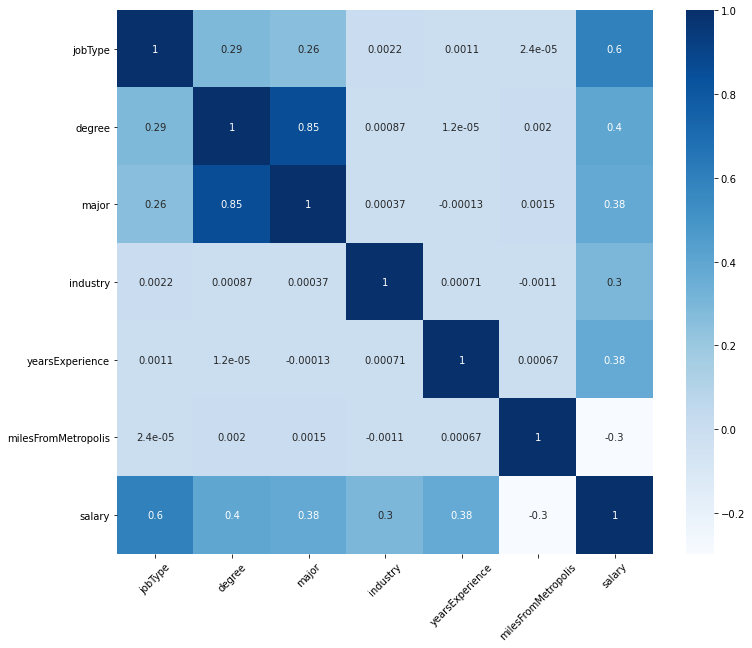

In [46]:
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df_copy[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.savefig("/Users/gulbazkhan/Desktop/data/correlation_matrix_heatmap.png")
plt.show();

In [47]:
#Degree, major, and job type have relatively high correlations with each other. This is expected since one's job is directly reltaed to his/her expertise. 
#JobId is removed since it is distinct for each worker.

# defining a baseline

In [48]:

#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [49]:
# the column of industry is already encoded as the average salary 
mse_base = mean_squared_error(train_df_copy['industry'], train_df_copy['salary'])
mse_base


1367.122950785255

# define the solution

In [50]:

# Model 1 Linear Regression
from sklearn.linear_model import LinearRegression # most straight forward and fast to compute
# Model 2: Random Forest
from sklearn.ensemble import RandomForestRegressor # more accurate especially with a large amount of data
# Model 3: Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor # reduce overfitting

# Develop the model MSE<360

In [51]:
cat_variables.remove('jobId')
cat_variables.remove('companyId')

In [52]:
dummy_features_train = pd.get_dummies(train_df[cat_variables], drop_first=True)
train_df_reg = pd.concat([dummy_features_train, train_df[num_variables]], axis=1)
train_df_reg.head(5)

,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,degree_HIGH_SCHOOL,degree_BACHELORS,degree_MASTERS,...,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL,yearsExperience,milesFromMetropolis,salary
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,10,83,130
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,3,73,101
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,10,38,137
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,8,17,142
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,8,16,163


In [53]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(train_df_reg.iloc[:,:-1], train_df_reg.salary, test_size=0.2)

In [54]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(799996, 27)

(199999, 27)

(799996,)

(199999,)

#### Linear Regression

In [55]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
lin_reg.score(X_train, y_train)

0.7436287925976195

In [57]:
lr_predict = lin_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predict) # calculate the mean square error of the linear model
lr_mse

384.33299886568034

#### Random Forests

In [58]:
rf_reg = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, min_samples_split=60, max_features='auto', verbose=0)

In [59]:

# calculate the mean square error of the random forest model
rf_nmse = cross_val_score(rf_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error") 
rf_mse = -1.0 * np.mean(rf_nmse)
rf_mse

389.1529313899125

#### Gradient Boosting

In [60]:
gb_reg = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)
# calculate the mean square error of the gradient boosting model
gb_nmse = cross_val_score(gb_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
gb_mse = -1.0 * np.mean(gb_nmse)
gb_mse

361.7943770069496

## Selection of best model

In [61]:
models_mse = {'models': ['Linear Regression', 'Random Forest', 'Gradient Boosting'], 'mean_squared_error': [lr_mse, rf_mse, gb_mse]}
model = pd.DataFrame(models_mse)
model

,models,mean_squared_error
0,Linear Regression,384.332999
1,Random Forest,389.152931
2,Gradient Boosting,361.794377


# Deploy the model (Automate pipeline)

In [62]:
num_variables.remove('salary')
dummy_features_test = pd.get_dummies(test_features_df[cat_variables], drop_first=True)
test_df_reg = pd.concat([dummy_features_test, test_features_df[num_variables]], axis=1)
test_df_reg.head(3)

,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_DOCTORAL,degree_HIGH_SCHOOL,degree_MASTERS,...,major_NONE,major_PHYSICS,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,22,73
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,20,47
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,17,9


In [63]:
# write script that trains model on entire training set, saves model to disk
gb_reg.fit(train_df_reg.iloc[:,:-1], train_df_reg.salary)

GradientBoostingRegressor(max_depth=6, n_estimators=160)

In [64]:
test_prediction = gb_reg.predict(test_df_reg) # predict 
prediction = pd.DataFrame(test_prediction).rename(columns={0:'predicted_salary'})
# and scores the "test" dataset
prediction_final = pd.concat([test_features_df['jobId'], prediction], axis=1)
prediction_final.head()

,jobId,predicted_salary
0,JOB1362685407687,143.293156
1,JOB1362685407688,140.000311
2,JOB1362685407689,136.299671
3,JOB1362685407690,125.276273
4,JOB1362685407691,116.435501


In [66]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

prediction_final.to_csv("/Users/gulbazkhan/Desktop/data/predicted_salaries.csv")